In [1]:
from IPython.display import Image
import itertools

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import numpy as np

%matplotlib inline

# Priors for Bayesian NNs and their Decision Boundaries


In [105]:
def logistic(x):
    return 1./(1+np.exp(-x))

def relu(x): 
    return np.maximum(0, x)

def stepFn(x): 
    return np.around(np.tanh(x))

def draw_NN(X, prior, activation, n_input=1, n_hidden=10000, n_output=1):
    W1 = prior(size=(n_input, n_hidden))
    W2 = prior(size=(n_hidden, n_output))
    
    h  = activation(np.dot(X, W1))
    o  = np.dot(h, W2)
    
    return o

def visualize_decision_boundary(x, y, label_str=None):
    plt.plot(x, y, '-', linewidth = 5, label = label_str)

### Gaussian Priors and Brownian Motion

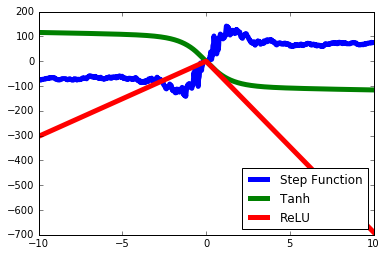

In [163]:
x = np.linspace(-10, 10, 1000)[np.newaxis].T

y = draw_NN(x, np.random.normal, activation=stepFn)
visualize_decision_boundary(x, y, "Step Function")

y = draw_NN(x, np.random.normal, activation=np.tanh)
visualize_decision_boundary(x, y, "Tanh")

y = draw_NN(x, np.random.normal, activation=relu)
visualize_decision_boundary(x, y, "ReLU")

plt.legend(loc=4)
plt.show()

### Student-t Priors and Fractional Brownian Motion

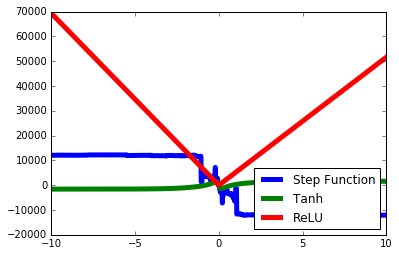

In [169]:
y = draw_NN(x, np.random.standard_cauchy, activation=stepFn)
visualize_decision_boundary(x, y, "Step Function")

y = draw_NN(x, np.random.standard_cauchy, activation=np.tanh)
visualize_decision_boundary(x, y, "Tanh")

y = draw_NN(x, np.random.standard_cauchy, activation=relu)
visualize_decision_boundary(x, y, "ReLU")

plt.legend(loc=4)
plt.show()